<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/05_05_01_dmd_template_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dynamic Mode Decomposition


## Import libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data Generation

### Functions for Sythetic Data

In [2]:
#Define the functions
def f1(xx, tt):
    lambda1 = -0.1 + 3j    # eigenvalue for mode1
    a1 = 1.0
    y_1 = np.cos(xx) * a1 * np.exp(lambda1 * tt)
    return y_1

def f2(xx, tt):
    lambda2 = +0.1 + 2j    # eigenvalue for mode1
    a2 = 0.5
    y_2 = np.sin(xx) * a2 * np.exp(lambda2 * tt)
    return y_2

### Synthetic Data Matrix, X

In [3]:
#Define time and space discretizations
xi = np.linspace(-2*np.pi, 2*np.pi, 721)
t = np.linspace(0, 2*np.pi, 361)
dt = t[1] - t[0]
tt, xx = np.meshgrid(t, xi)

noisy = False
if noisy:
        # Calculate the noise levels
        noise_level = 0.0  # Adjust as needed
        noise1 = np.random.normal(scale=noise_level, size=tt.shape)
        noise2 = np.random.normal(scale=noise_level, size=tt.shape)
        f1_noisy = f1(xx, tt) + noise1
        f2_noisy = f2(xx, tt) + noise2
        # Combine the noisy functions
        X = f1_noisy + f2_noisy
else:
        f1 = f1(xx, tt)
        f2 = f2(xx, tt)
        X = f1 + f2


In [4]:
print(dt)

0.017453292519943295


In [5]:
print(X.shape)

(721, 361)


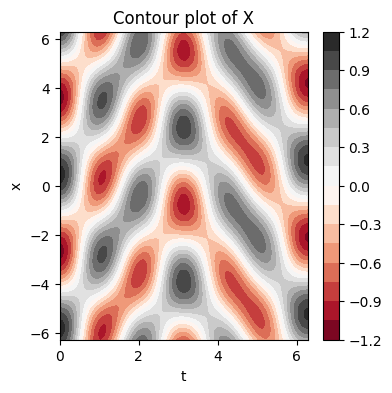

In [6]:
plt.figure(figsize=(4, 4))
plt.contourf(tt, xx, X.real, 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

## Step 1: Split the data matrix X into X_1 and X_2

In [7]:
X_1 = X[:, :-1]
X_2 = X[:, 1:]


In [8]:
print(X_1.shape, X_2.shape)

(721, 360) (721, 360)


## Step 2: Perform Singular Value Decomposition (SVD) on X_1


In [9]:
U, S, VT = np.linalg.svd(X_1,full_matrices=False)
V=VT.conj().T
S=np.diag(S)
print(U.shape,S.shape, V.shape)


(721, 360) (360, 360) (360, 360)


### Singular Values

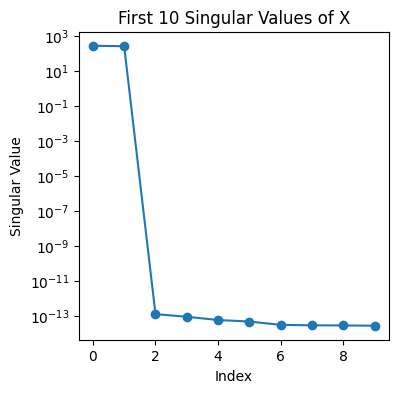

In [10]:
plt.figure(figsize=(4, 4))
plt.semilogy(np.diag(S[:10]), 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [11]:
print(S[:2,:2])


[[272.2390206    0.        ]
 [  0.         254.35209047]]


### Columns of U Matrix

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


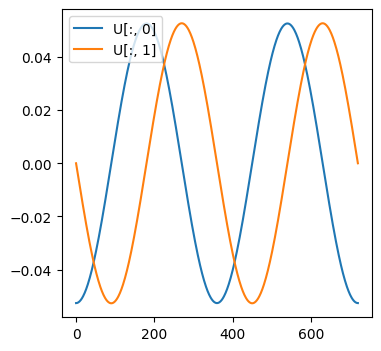

In [12]:
# U
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
#plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3]/5, label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()

### Columns of V Matrix

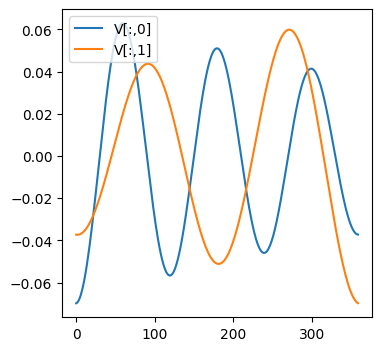

In [13]:
# V
plt.figure(figsize=(4, 4))
plt.plot(V[:,0], label='V[:,0]')
plt.plot(V[:,1], label='V[:,1]')
#plt.plot(V[:,2], label='V[:,2]')
#plt.plot(V[:,3]/5, label='V[:,3]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

## Step 3: Rank Truncation (to reduce the noise)

In [14]:
r =2
Ur = U[:,:r]
Sr = S[:r,:r]
Vr = V[:,:r]
print(Ur.shape, Sr.shape, Vr.shape)

(721, 2) (2, 2) (360, 2)


In [15]:
print(X_2.shape)

(721, 360)


In [16]:
print(Ur[:r,:r])

[[-5.26315789e-02-2.24464646e-17j -1.43465760e-16-1.23774002e-17j]
 [-5.26235629e-02+1.66130625e-16j -9.19822583e-04-2.34418168e-16j]]


## Step 4: Low Rank Dynamics, A~

In [17]:
A_tilde =  (Ur.conj().T) @ X_2 @ Vr @ np.linalg.inv(Sr)

In [18]:
print(A_tilde)

[[9.96888118e-01+5.22446924e-02j 1.88563949e-16+2.79353999e-16j]
 [8.15623728e-17+0.00000000e+00j 1.00113662e+00+3.49604610e-02j]]


## Step 5: Eigen Decomposition of A~

In [19]:
Lambda, W = np.linalg.eig(A_tilde)

In [20]:
#Lambda = np.diag(Lambda)
print(Lambda)

[0.99688812+0.05224469j 1.00113662+0.03496046j]


### Plot the eigenvalues Lambda in the complex plane

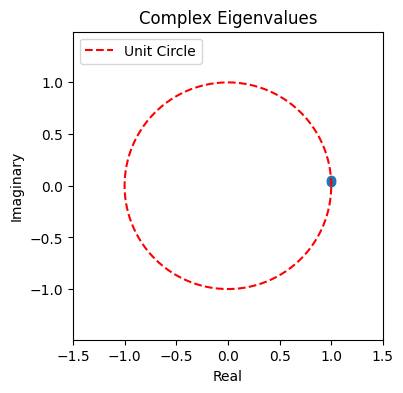

In [21]:
# Plot the eigenvalues in the complex plane
plt.figure(figsize=(4, 4))
plt.scatter(Lambda.real, Lambda.imag)

# Plot unit circle
theta = np.linspace(0, 2*np.pi, 360)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='r', label='Unit Circle')

plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Eigenvalues')
#plt.grid(True)
plt.legend(loc='upper left')
plt.show()

#### Plot the magnitudes of Lambda

[0.99825619 1.00174685]


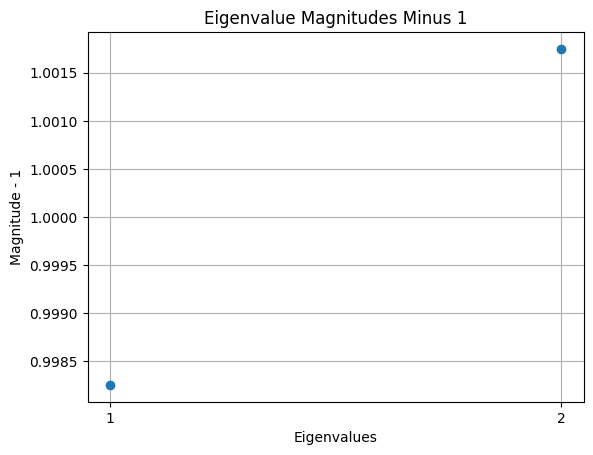

In [22]:
#mag = np.abs(Lambda)
mag = np.sqrt(Lambda.real**2 + Lambda.imag**2)
print(mag)
magm1 = mag

# Create an integer array for x-axis: 1, 2, 3, ...
x_indices = np.arange(1, len(magm1) + 1)

# Plot
plt.figure()
plt.plot(x_indices, magm1, 'o')
plt.xlabel('Eigenvalues')
plt.ylabel('Magnitude - 1')
plt.title('Eigenvalue Magnitudes Minus 1')
plt.grid(True)
plt.xticks(x_indices)
plt.show()

In [23]:
print(W)

[[ 1.00000000e+00+0.0000000e+00j -1.27126791e-14+1.4034396e-14j]
 [ 0.00000000e+00+0.0000000e+00j  1.00000000e+00+0.0000000e+00j]]


## Step 6: Compute the DMD modes and spectrum

### 6.1: DMD modes

In [24]:
Phi = X_2 @ Vr @ np.linalg.inv(Sr) @ W

In [25]:
print(Phi[:r,:])

[[-5.24677957e-02-2.74972065e-03j  6.04331092e-16-7.32824829e-16j]
 [-5.24598046e-02-2.74930186e-03j -9.20868068e-04-3.21574215e-05j]]


### 6.2: Discrete-time eigencalues

In [26]:
alpha = np.log(Lambda)/dt

In [27]:
print(alpha.shape)
print(alpha)
print("The real parts", np.real(alpha))
print("The imaginary parts", np.imag(alpha))


(2,)
[-0.1+3.j  0.1+2.j]
The real parts [-0.1  0.1]
The imaginary parts [3. 2.]


### 6.3: Amplitudes of the DMD modes

In [28]:
amp = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]

In [29]:
print(amp.shape)
print(amp)

(2,)
[-19.00710589+0.99612021j  -9.46452073+0.33050835j]


### 6.4: Dynamics of the DMD modes, Eq (10) in the notes

In [30]:
t_exp = np.arange(X.shape[1]) * dt

temp = np.repeat(alpha.reshape(-1,1), t_exp.size, axis=1)

dynamics = np.exp(temp * t_exp) * amp.reshape(amp.shape[0], -1)

print(t_exp.shape, temp.shape, dynamics.shape)
print(X.shape[1])
print(t_exp.size)

(361,) (2, 361) (2, 361)
361
361


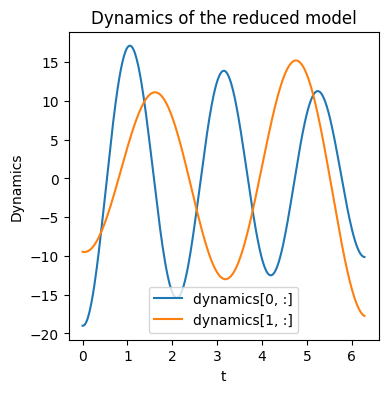

In [31]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.plot(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


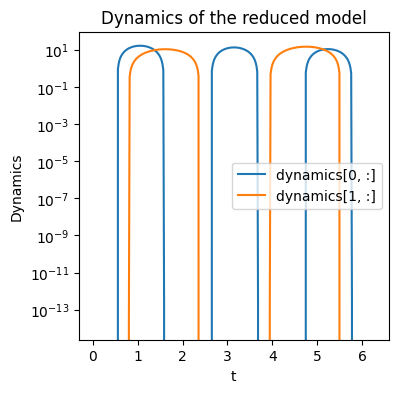

In [32]:
plt.figure(figsize=(4, 4))
plt.semilogy(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.semilogy(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


### 6.5: Field reconstruction, Eqn (10) in the notes

In [33]:
X_dmd = Phi @ dynamics
print(X_dmd.shape)

(721, 361)


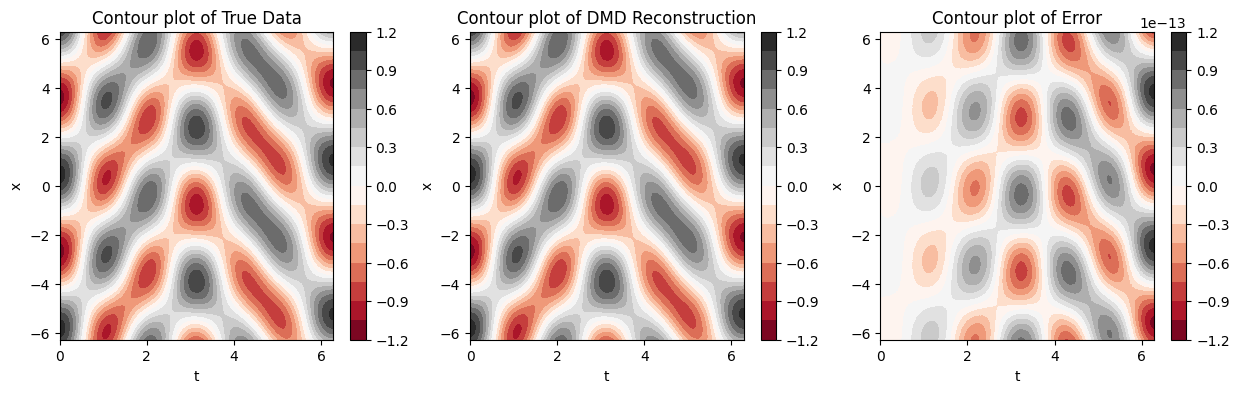

In [34]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of True Data')

plt.subplot(1, 3, 2)
plt.contourf(tt, xx, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of DMD Reconstruction')

X_diff = np.real(X) - np.real(X_dmd)
#levels = np.linspace(-1E-11, 1E-11, 21)
levels = 20
plt.subplot(1, 3, 3)
plt.contourf(tt, xx, X_diff , levels=levels, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of Error')


plt.show()